In [1]:
import pandas as pd
import numpy as np
from Levenshtein import distance as levenshtein_distance
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_dataset = pd.read_csv('data/pf_suvs_i302_1s2025.csv')


In [3]:
raw_dataset

h       Marca           Modelo     Año  \
0          0        Ford         Ecosport  2020.0   
1          1  Volkswagen           Tiguan  2024.0   
2          2  Volkswagen  Tiguan Allspace  2019.0   
3          3        Ford         Ecosport  2017.0   
4          4        Jeep          Compass  2021.0   
...      ...         ...              ...     ...   
18249  18249  Volkswagen          T-Cross  2025.0   
18250  18250  Volkswagen          T-Cross  2025.0   
18251  18251  Volkswagen          T-Cross  2025.0   
18252  18252  Volkswagen          T-Cross  2025.0   
18253  18253  Volkswagen          T-Cross  2025.0   

                                Versión   Color Tipo de combustible  Puertas  \
0               1.5 Freestyle 123cv 4x2  Blanco               Nafta      5.0   
1                       LIFE 350 TSI 4M   Negro               Nafta      5.0   
2           1.4 Tsi Trendline 150cv Dsg   Negro               Nafta      5.0   
3                1.5 Titanium 123Cv 4X2  Blanco               Nafta      5.0   
4                          2.4 Sport At     NaN               Nafta      5.0   
...                                 ...     ...                 ...      ...   
18249  1.0 200 Tsi Highline Bi-Tono Aut  Blanco               Nafta      5.0   
18250       1.0 200 Tsi Comfortline Aut   Negro               Nafta      5.0   
18251       1.0 200 Tsi Comfortline Aut   Negro               Nafta      5.0   
18252       1.0 200 Tsi Comfortline Aut   Negro               Nafta      5.0   
18253                    1.0 170 Tsi Mt  Blanco               Nafta      5.0   

                 Transmisión                  Motor Tipo de carrocería  \
0                     Manual                    1.5                SUV   
1      Automática secuencial  2.0 L 230 CV  350 TSI                SUV   
2                 Automática                    1.4                SUV   
3                     Manual                    1.5                SUV   
4                 Automática                    2.4                SUV   
...                      ...                    ...                ...   
18249             Automática                    1.0                SUV   
18250             Automática                    1.0                SUV   
18251             Automática                    1.0                SUV   
18252             Automática                    1.0                SUV   
18253                 Manual                    1.0                SUV   

      Con cámara de retroceso Kilómetros  \
0                          No    64000.0   
1                          Sí        0.0   
2                         NaN    65300.0   
3                         NaN    76898.0   
4                         NaN   109000.0   
...                       ...        ...   
18249                     NaN       0 km   
18250                     NaN       0 km   
18251                     NaN       0 km   
18252                     NaN       0 km   
18253                     NaN       0 km   

                                                  Título      Precio Moneda  \
0                  Ford Ecosport 1.5 Freestyle 123cv 4x2  20500000.0      $   
1                             Tiguan Life 350 Tsi 4m  Ar  55999900.0      $   
2      Volkswagen Tiguan Allspace 1.4 Tsi Trendline 1...     28300.0    US$   
3                   Ford Ecosport 1.5 Titanium 123Cv 4X2  20090000.0      $   
4                              Jeep Compass 2.4 Sport At     23000.0    US$   
...                                                  ...         ...    ...   
18249  Volkswagen T-Cross 1.0 200 Tsi Highline Bi-Ton...  40900000.0      $   
18250     Volkswagen T-Cross 1.0 200 Tsi Comfortline Aut  35500000.0      $   
18251     Volkswagen T-Cross 1.0 200 Tsi Comfortline Aut  35500000.0      $   
18252     Volkswagen T-Cross 1.0 200 Tsi Comfortline Aut  35500000.0      $   
18253                  Volkswagen T-Cross 1.0 170 Tsi Mt  28900000.0      $   

                                             D

In [4]:
raw_dataset["Marca"] = raw_dataset["Marca"].replace("Vol", "Volkswagen")

In [5]:
raw_dataset['Caracteres_descripcion'] = raw_dataset['Descripción'].apply(lambda x: len(str(x)))
raw_dataset['Caracteres_descripcion'].describe()

print("Cantidad de filas sin descripción:", raw_dataset[raw_dataset['Descripción'].isnull()].shape[0])

Cantidad de filas sin descripción: 0


In [6]:
# Peso a dolar
precio_dolar = 1150
mask = raw_dataset['Moneda'] == '$'
raw_dataset.loc[mask, 'Precio'] = raw_dataset.loc[mask, 'Precio'] / precio_dolar

In [7]:
for i in range(len(raw_dataset)):
    if raw_dataset['Color'][i] == np.nan:
        raw_dataset['Color'][i] = 'Otro'

known_colors = ['Blanco', 'Negro', 'Gris', 'Plata', 'Acero', 'Azul', 'Gray', 'Rojo', 
                'Granito', 'Beige', 'Verde', 'Marrón', 'Amarillo', 'Violeta', 'Naranja', 
                'Dorado', 'Grafito', 'White', 'Cobre', 'Black', 'Rosa', 'Celeste', 'Morado', 
                'Plateado', 'Celeste', 'Beige', 'blue', 'Bordó', 'Celeste', 'Otro']

for color in known_colors:
    raw_dataset[color] = 0

for i, color_input in enumerate(raw_dataset['Color']):
    dists = [levenshtein_distance(str(color_input).lower(), color.lower()) for color in known_colors]
    idx_min = np.argmin(dists)
    matched_color = known_colors[idx_min]
    raw_dataset.at[i, matched_color] = 1

In [8]:
print(raw_dataset["Puertas"].unique())
print("Cantidad de muestras con 'Puertas' igual a 60252:", (raw_dataset["Puertas"] == 60252).sum())

[5.0000e+00 3.0000e+00 4.0000e+00 6.0000e+00 6.0252e+04 2.0000e+00
 7.0000e+00]
Cantidad de muestras con 'Puertas' igual a 60252: 4


In [ ]:
def clean_km_value(value):
    """Limpia un valor individual de kilómetros"""
    if pd.isna(value):
        return np.nan
    
    value_str = str(value).strip()
    
    if value_str.endswith(' km'):
        value_str = value_str[:-3].strip()
    if value_str.endswith('km'):
        value_str = value_str[:-2].strip()
    
    if '.' in value_str:
        parts = value_str.split('.')
        if len(parts) == 2:
            if parts[1] == '0':
                return float(parts[0])
            elif len(parts[1]) == 3 and parts[1].isdigit():
                return float(parts[0] + parts[1])
            else:
                return float(value_str)
    
    try:
        return float(value_str)
    except ValueError:
        return np.nan

def clean_kilometers(raw_dataset):
    """
    Limpia la columna 'Kilómetros' removiendo 'km' y '.0', 
    y convirtiendo correctamente valores como '37.000 km' a 37000
    """
    df = raw_dataset.copy()
    
    df['Kilómetros'] = df['Kilómetros'].apply(clean_km_value)
    
    return df

np.set_printoptions(suppress=True, formatter={'float': '{:.0f}'.format})

raw_dataset = clean_kilometers(raw_dataset)
raw_dataset['Kilómetros'].unique()

array([64000, 0, 65300, ..., 88800, 999999, 19611], shape=(2126,))

In [10]:
#imprimi los nan del dataser raw_dataset
print("Cantidad de filas con NaN en 'Título':", raw_dataset.isnull().sum())

Cantidad de filas con NaN en 'Título': h                              0
Marca                          0
Modelo                         0
Año                            0
Versión                        0
Color                        389
Tipo de combustible            0
Puertas                        0
Transmisión                   15
Motor                         38
Tipo de carrocería             0
Con cámara de retroceso    13563
Kilómetros                     0
Título                         0
Precio                         0
Moneda                         0
Descripción                    0
Tipo de vendedor               0
Caracteres_descripcion         0
Blanco                         0
Negro                          0
Gris                           0
Plata                          0
Acero                          0
Azul                           0
Gray                           0
Rojo                           0
Granito                        0
Beige                          0
Verd

In [11]:
raw_dataset["Marca"].unique()

array(['Ford', 'Volkswagen', 'Jeep', 'BAIC', 'Kia', 'Hyundai', 'Porsche',
       'Peugeot', 'Fiat', 'Chevrolet', 'Citroën', 'BMW', 'Audi', 'Honda',
       'Nissan', 'Mercedes-Benz', 'Renault', 'Suzuki', 'Toyota', 'D.S.',
       'Chery', 'Daihatsu', 'SsangYong', 'Dodge', 'JAC', 'Land Rover',
       'Alfa Romeo', 'Haval', 'Volvo', 'Lifan', 'Mini', 'D·S',
       'Mitsubishi', 'Range Rover', 'Hiunday', 'Jetour', 'GWM', 'KAIYI',
       'Lexus', 'Isuzu', 'Rrenault', 'Subaru', 'Jetur', 'DS AUTOMOBILES',
       'hiunday', 'Jaguar'], dtype=object)

In [12]:
raw_dataset["Marca"] = raw_dataset["Marca"].replace("Vol", "Volkswagen")

In [13]:
known_brands = [
  'Ford', 'Volkswagen', 'Jeep', 'BAIC', 'Kia', 'Hyundai', 'Porsche',
  'Peugeot', 'Fiat', 'Chevrolet', 'Citroën', 'BMW', 'Audi', 'Honda',
  'Nissan', 'Mercedes-Benz', 'Renault', 'Suzuki', 'Toyota',
  'Chery', 'Daihatsu', 'SsangYong', 'Dodge', 'JAC', 'Land Rover',
  'Alfa Romeo', 'Haval', 'Volvo', 'Lifan', 'Mini', 'D·S',
  'Mitsubishi', 'Jetour', 'GWM', 'KAIYI',
  'Lexus', 'Isuzu', 'Subaru', 'Jaguar'
]

In [14]:
for brand in known_brands:
    raw_dataset[brand] = 0

for i, marca_input in enumerate(raw_dataset['Marca']):
    dists = [levenshtein_distance(str(marca_input).lower(), brand.lower()) for brand in known_brands]
    idx_min = np.argmin(dists)
    matched_brand = known_brands[idx_min]
    raw_dataset.at[i, matched_brand] = 1

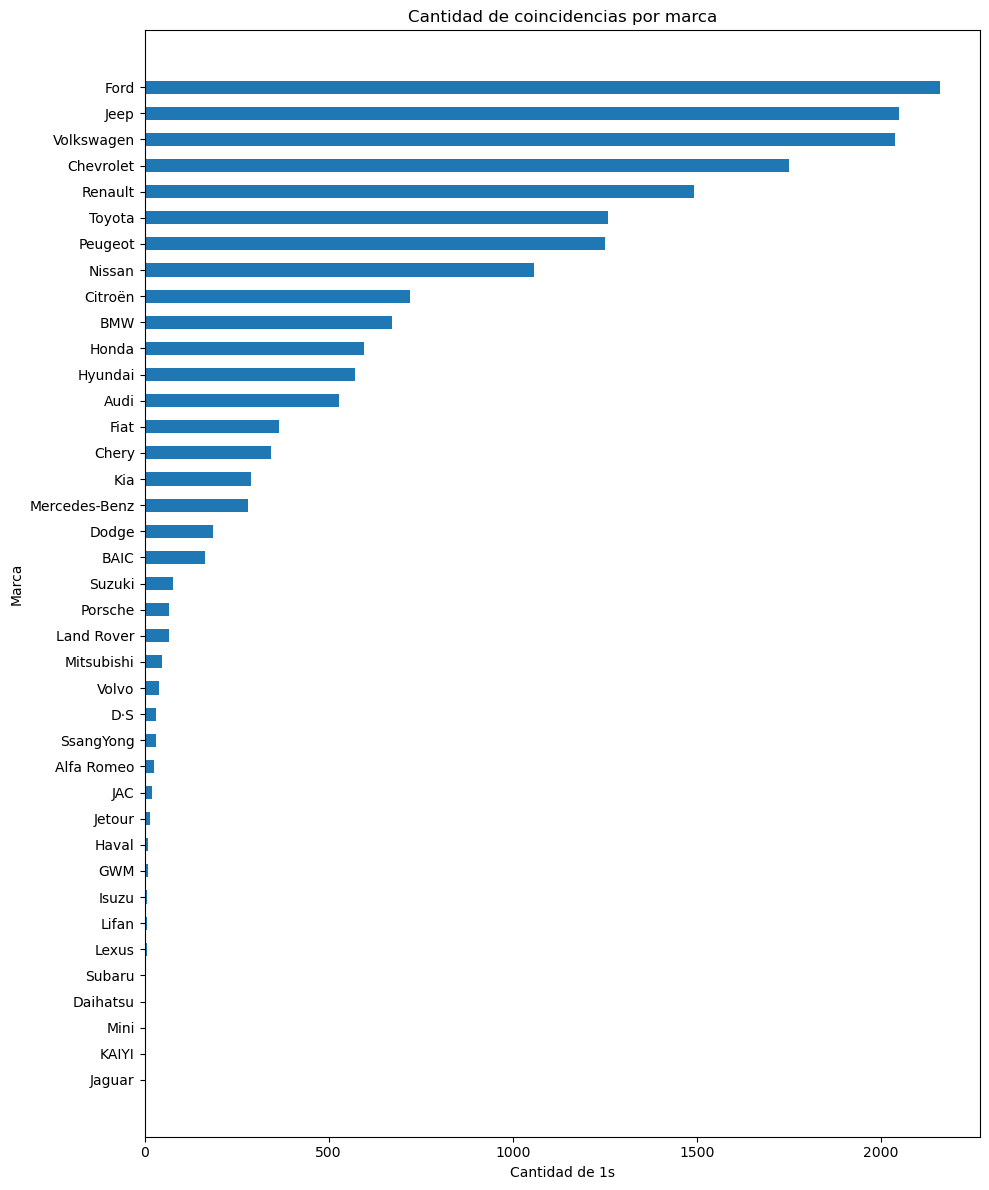

In [15]:
brand_counts = raw_dataset[known_brands].sum().sort_values()

fig, ax = plt.subplots(figsize=(10, 12))

ax.barh(brand_counts.index, brand_counts.values, height=0.5)

ax.set_title("Cantidad de coincidencias por marca")
ax.set_xlabel("Cantidad de 1s")
ax.set_ylabel("Marca")

plt.tight_layout()
plt.show()

In [16]:
precio_dolar = 1150
mask = raw_dataset['Moneda'] == '$'
raw_dataset.loc[mask, 'Precio'] = raw_dataset.loc[mask, 'Precio'] / precio_dolar

In [17]:
raw_dataset['Caracteres_descripcion'] = raw_dataset['Descripción'].apply(lambda x: len(str(x)))

In [18]:
raw_dataset.drop('Tipo de carrocería', axis=1, inplace=True)

### $\log (precio) \sim \mathcal{N}(\mu, \sigma^2)$

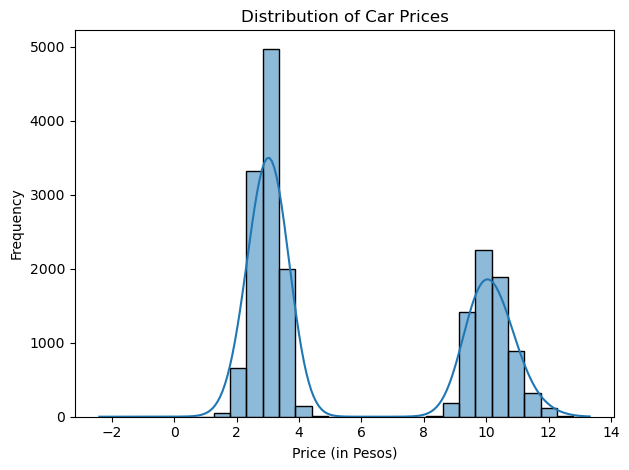

In [19]:
sns.histplot(np.log(raw_dataset['Precio']), bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (in Pesos)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

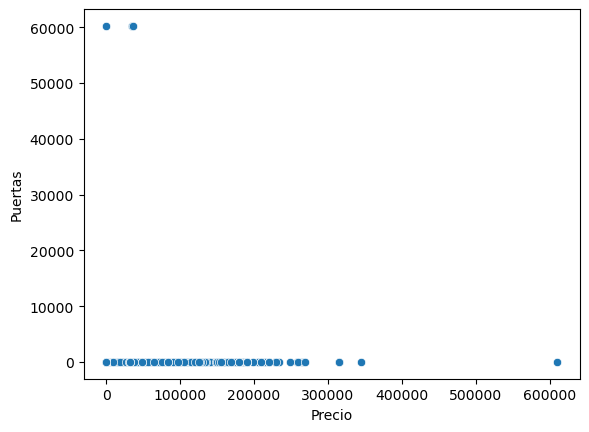

In [20]:
sns.scatterplot(x=raw_dataset['Precio'], y=raw_dataset['Puertas'])
plt.show()

In [21]:
print(np.unique(raw_dataset['Modelo']))

['2008' '208' '3008' '4008' '4Runner' '500X' 'Actyon' 'Blazer' 'Bronco'
 'Bronco Sport' 'C3' 'C3 Aircross' 'C4 Aircross' 'C4 Cactus' 'C5 Aircross'
 'CR-V' 'Captur' 'Cayenne' 'Cherokee' 'Clase GL' 'Clase GLA' 'Clase GLC'
 'Clase GLE' 'Clase GLK' 'Clase ML' 'Commander' 'Compass'
 'Cooper Countryman' 'Corolla Cross' 'Creta' 'DS3' 'DS7' 'DS7 Crossback'
 'Defender' 'Discovery' 'Duster' 'Duster Oroch' 'Ecosport' 'Equinox'
 'Evoque' 'Explorer' 'F-PACE' 'Freelander' 'Galloper' 'Grand Blazer'
 'Grand Cherokee' 'Grand Santa Fé' 'Grand Vitara' 'H6' 'HR-V' 'Hilux SW4'
 'Jimny' 'Jolion' 'Journey' 'Kicks' 'Koleos' 'Kona' 'Kuga' 'Land Cruiser'
 'ML' 'Macan' 'Mohave' 'Montero' 'Murano' 'Musso' 'Myway' 'NX' 'Nativa'
 'Nivus' 'Outback' 'Outlander' 'Panamera' 'Pathfinder' 'Patriot' 'Pilot'
 'Pulse' 'Q2' 'Q3' 'Q3 Sportback' 'Q5' 'Q7' 'Q8' 'RAV4' 'Range Rover'
 'Range Rover Sport' 'Renegade' 'S2' 'SQ5' 'SW4' 'Samurai' 'Sandero'
 'Sandero Stepway' 'Santa Fe' 'Seltos' 'Serie 4' 'Sorento' 'Soul' 'Spin'
 'Spor

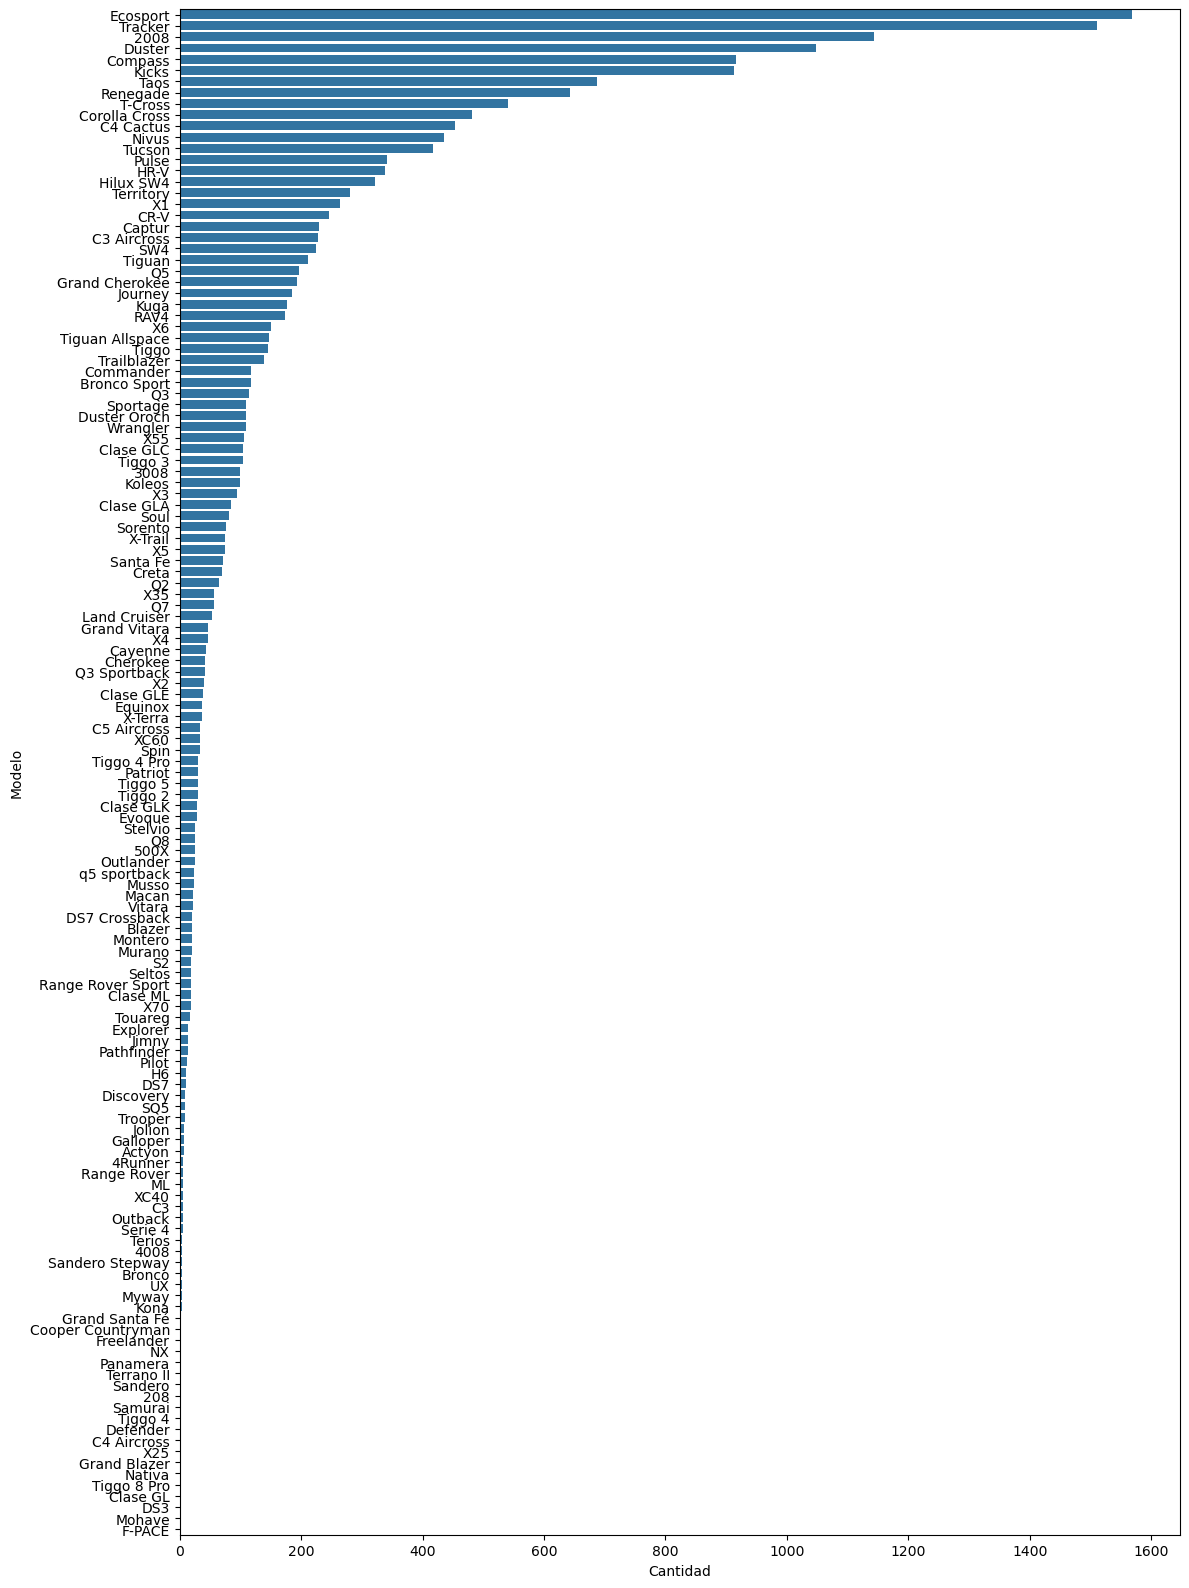

In [22]:
plt.figure(figsize=(12, 16))
sns.countplot(data=raw_dataset, y='Modelo', order=raw_dataset['Modelo'].value_counts().index)
plt.xlabel('Cantidad')
plt.ylabel('Modelo')
plt.tight_layout()
plt.show()

In [23]:
known_models = [
    '2008', '208', '3008', '4008', '4Runner', '500X', 'Actyon', 'Blazer', 'Bronco',
    'Bronco Sport', 'C3', 'C3 Aircross', 'C4 Aircross', 'C4 Cactus', 'C5 Aircross',
    'CR-V', 'Captur', 'Cayenne', 'Cherokee', 'Clase GL', 'Clase GLA', 'Clase GLC',
    'Clase GLE', 'Clase GLK', 'Commander', 'Compass', 'Cooper Countryman', 'Corolla Cross',
    'Creta', 'DS3', 'DS7', 'DS7 Crossback', 'Defender', 'Discovery', 'Duster',
    'Duster Oroch', 'Ecosport', 'Equinox', 'Evoque', 'Explorer', 'F-PACE', 'Freelander',
    'Galloper', 'Grand Blazer', 'Grand Cherokee', 'Grand Santa Fé', 'Grand Vitara',
    'H6', 'HR-V', 'Hilux SW4', 'Jimny', 'Jolion', 'Journey', 'Kicks', 'Koleos',
    'Kona', 'Kuga', 'Land Cruiser', 'ML', 'Macan', 'Mohave', 'Montero', 'Murano',
    'Musso', 'Myway', 'NX', 'Nativa', 'Nivus', 'Outback', 'Outlander', 'Panamera',
    'Pathfinder', 'Patriot', 'Pilot', 'Pulse', 'Q2', 'Q3', 'Q3 Sportback', 'Q5', 'Q7',
    'Q8', 'RAV4', 'Range Rover', 'Range Rover Sport', 'Renegade', 'S2', 'SQ5', 'SW4',
    'Samurai', 'Sandero', 'Sandero Stepway', 'Santa Fe', 'Seltos', 'Serie 4', 'Sorento',
    'Soul', 'Spin', 'Sportage', 'Stelvio', 'T-Cross', 'Taos', 'Terios', 'Terrano II',
    'Territory', 'Tiggo', 'Tiggo 2', 'Tiggo 3', 'Tiggo 4', 'Tiggo 4 Pro', 'Tiggo 5',
    'Tiggo 8 Pro', 'Tiguan', 'Tiguan Allspace', 'Touareg', 'Tracker', 'Trailblazer',
    'Trooper', 'Tucson', 'UX', 'Vitara', 'Wrangler', 'X-Terra', 'X-Trail', 'X1', 'X2',
    'X25', 'X3', 'X35', 'X4', 'X5', 'X55', 'X6', 'X70', 'XC40', 'XC60', 'q5 sportback'
]

model_columns = pd.DataFrame(0, index=raw_dataset.index, columns=known_models)
raw_dataset = pd.concat([raw_dataset, model_columns], axis=1)

for i, modelo_input in enumerate(raw_dataset['Modelo']):
    dists = [levenshtein_distance(str(modelo_input).lower(), model.lower()) for model in known_models]
    idx_min = np.argmin(dists)
    matched_model = known_models[idx_min]
    raw_dataset.at[i, matched_model] = 1

In [ ]:
unique_model = raw_dataset["Modelo"].unique()
diccionario = {model: 0 for model in unique_model}
for i in range(len(raw_dataset)):
    modelo = raw_dataset["Modelo"][i]
    if pd.isna(raw_dataset["Con cámara de retroceso"][i]):
        diccionario[modelo] += 1

diccionario2 = {model: 0 for model in unique_model}
for i in range(len(raw_dataset)):
    modelo = raw_dataset["Modelo"][i]
    diccionario2[modelo] += 1

print(diccionario)
print(diccionario2)

raw_dataset["Con cámara de retroceso"] = raw_dataset["Con cámara de retroceso"].map({
    "Sí": 1,
    "No": 0
})

promedio_por_modelo = {
    modelo: -1 if pd.isna(raw_dataset.loc[raw_dataset["Modelo"] == modelo, "Con cámara de retroceso"].mean())
    else raw_dataset.loc[raw_dataset["Modelo"] == modelo, "Con cámara de retroceso"].mean()
    for modelo in unique_model
}

raw_dataset['Con cámara de retroceso'] = raw_dataset['Con cámara de retroceso'].fillna(raw_dataset["Modelo"].map(promedio_por_modelo))

print(raw_dataset.isnull().sum().to_string())

{'Ecosport': 1281, 'Tiguan': 155, 'Tiguan Allspace': 115, 'Compass': 657, 'X55': 22, 'Sorento': 48, 'Tucson': 301, 'Cayenne': 32, 'Renegade': 474, '2008': 833, 'Pulse': 257, 'Tracker': 1175, 'C4 Cactus': 325, 'Wrangler': 92, 'X1': 191, '3008': 74, 'Q5': 149, 'Taos': 503, 'CR-V': 188, 'Kicks': 717, 'Q3': 85, 'Clase GLE': 33, 'HR-V': 240, 'Duster': 789, 'Vitara': 18, 'T-Cross': 410, 'RAV4': 117, 'Kuga': 128, 'Creta': 39, 'Corolla Cross': 339, 'Hilux SW4': 248, 'Blazer': 14, 'DS7': 2, 'Trailblazer': 101, 'Grand Cherokee': 140, 'Nivus': 293, 'Santa Fe': 55, 'X3': 74, 'Tiggo 2': 19, 'Tiggo': 119, 'X-Trail': 51, 'X6': 123, 'Q7': 38, 'Terios': 4, 'C3 Aircross': 182, 'Panamera': 2, 'X35': 27, 'Musso': 11, 'Journey': 123, 'Duster Oroch': 94, 'X4': 32, 'Tiggo 3': 60, 'Tiggo 5': 21, 'Bronco Sport': 95, 'Commander': 84, 'SW4': 155, 'S2': 15, 'Touareg': 13, 'Captur': 167, 'X-Terra': 32, 'Equinox': 26, 'Clase ML': 16, '500X': 19, 'Territory': 211, 'X5': 59, 'Q8': 18, 'Land Cruiser': 48, 'Macan': 13,

In [25]:
modelos_con_outlier = raw_dataset.loc[raw_dataset['Puertas'] == 60252, 'Modelo'].unique()

for modelo in modelos_con_outlier:
    valor_valido = raw_dataset.loc[
        (raw_dataset['Modelo'] == modelo) & (raw_dataset['Puertas'] != 60252),
        'Puertas'
    ].iloc[0]

    raw_dataset.loc[
        (raw_dataset['Modelo'] == modelo) & (raw_dataset['Puertas'] == 60252),
        'Puertas'
    ] = valor_valido

In [26]:
dummies_combu = pd.get_dummies(raw_dataset['Tipo de combustible'], prefix='Combustible')
dummies_combu = dummies_combu.astype(int)
raw_dataset = pd.concat([raw_dataset, dummies_combu], axis=1)
raw_dataset = raw_dataset.drop(columns=['Tipo de combustible'])

dummies_tran = pd.get_dummies(raw_dataset['Transmisión'], prefix='Transmisión')
dummies_tran = dummies_tran.astype(int)
raw_dataset = pd.concat([raw_dataset, dummies_tran], axis=1)
raw_dataset = raw_dataset.drop(columns=['Transmisión'])

dummies_vend = pd.get_dummies(raw_dataset['Tipo de vendedor'], prefix='Vendedor')
dummies_vend = dummies_vend.astype(int)
raw_dataset = pd.concat([raw_dataset, dummies_vend], axis=1)
raw_dataset = raw_dataset.drop(columns=['Tipo de vendedor'])

In [27]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
print(raw_dataset.head(1))

   h Marca    Modelo     Año                  Versión   Color  Puertas Motor  \
0  0  Ford  Ecosport  2020.0  1.5 Freestyle 123cv 4x2  Blanco      5.0   1.5   

   Con cámara de retroceso  Kilómetros                                 Título  \
0                      0.0     64000.0  Ford Ecosport 1.5 Freestyle 123cv 4x2   

      Precio Moneda  \
0  15.500945      $   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [28]:
raw_dataset['Modelo'].describe()

count        18254
unique         137
top       Ecosport
freq          1569
Name: Modelo, dtype: object

In [29]:
raw_dataset['Motor'].unique()

array(['1.5', '2.0 L 230 CV  350 TSI', '1.4', '2.4', '1.5 TURBO', '2.0',
       '3.6', '1.8', '1.0', '1.3', '1.2 TURBO', '1.2', '1.6',
       'Nafta 2.0 (148cv) + Electrico (184.5cv)', '3.0', '2.2', '2.5',
       '1', '2.5l Hibrida', '2.8', '2.7', 'TURBOALIMENTADO',
       'TURBO DIESEL INYECCION', '4.8', '2.9', '1.3T',
       'INYECCION MULTI PUNTO', nan, 'diesel', '4.4', '3.0 440HP',
       '2.0 hurrican 4 272 cv 400nm', '6.4', '5.2', '1.5t', '1.4 TFSI',
       '2.3', '4.7', '2.0 TDI 140CV', '3.7', '3.2', '1500', '3.8',
       '1.3 TURBO', '4.5', '3', '2', '2.0 TURBO', '4.0 Nafta', '1.8L',
       '192 HP', '1.6 Naftero', '5.0', '1.5 TURBO 185 HP', 'P8 (408hp)',
       '1,3 t 175 cv 270 Nm', '1.6 Turbo', '4.2', '4.0', '1.0 tsi',
       '1.5 16V', '1.0 200 TSI', '1.8 de 140 hp', '2.0 350TSI', '3.5',
       '1.3L', '1.3 Turbo', '1.0 TURBO', '1.3 TURBO NAFTA 175CV AT9',
       'Motor naftero 1.8 105 CV 161 Nm', '1.0 3 CILINDROS', 'v8 302',
       '3.3 V6 TD 304cv 700 NM de torque', '1.5 

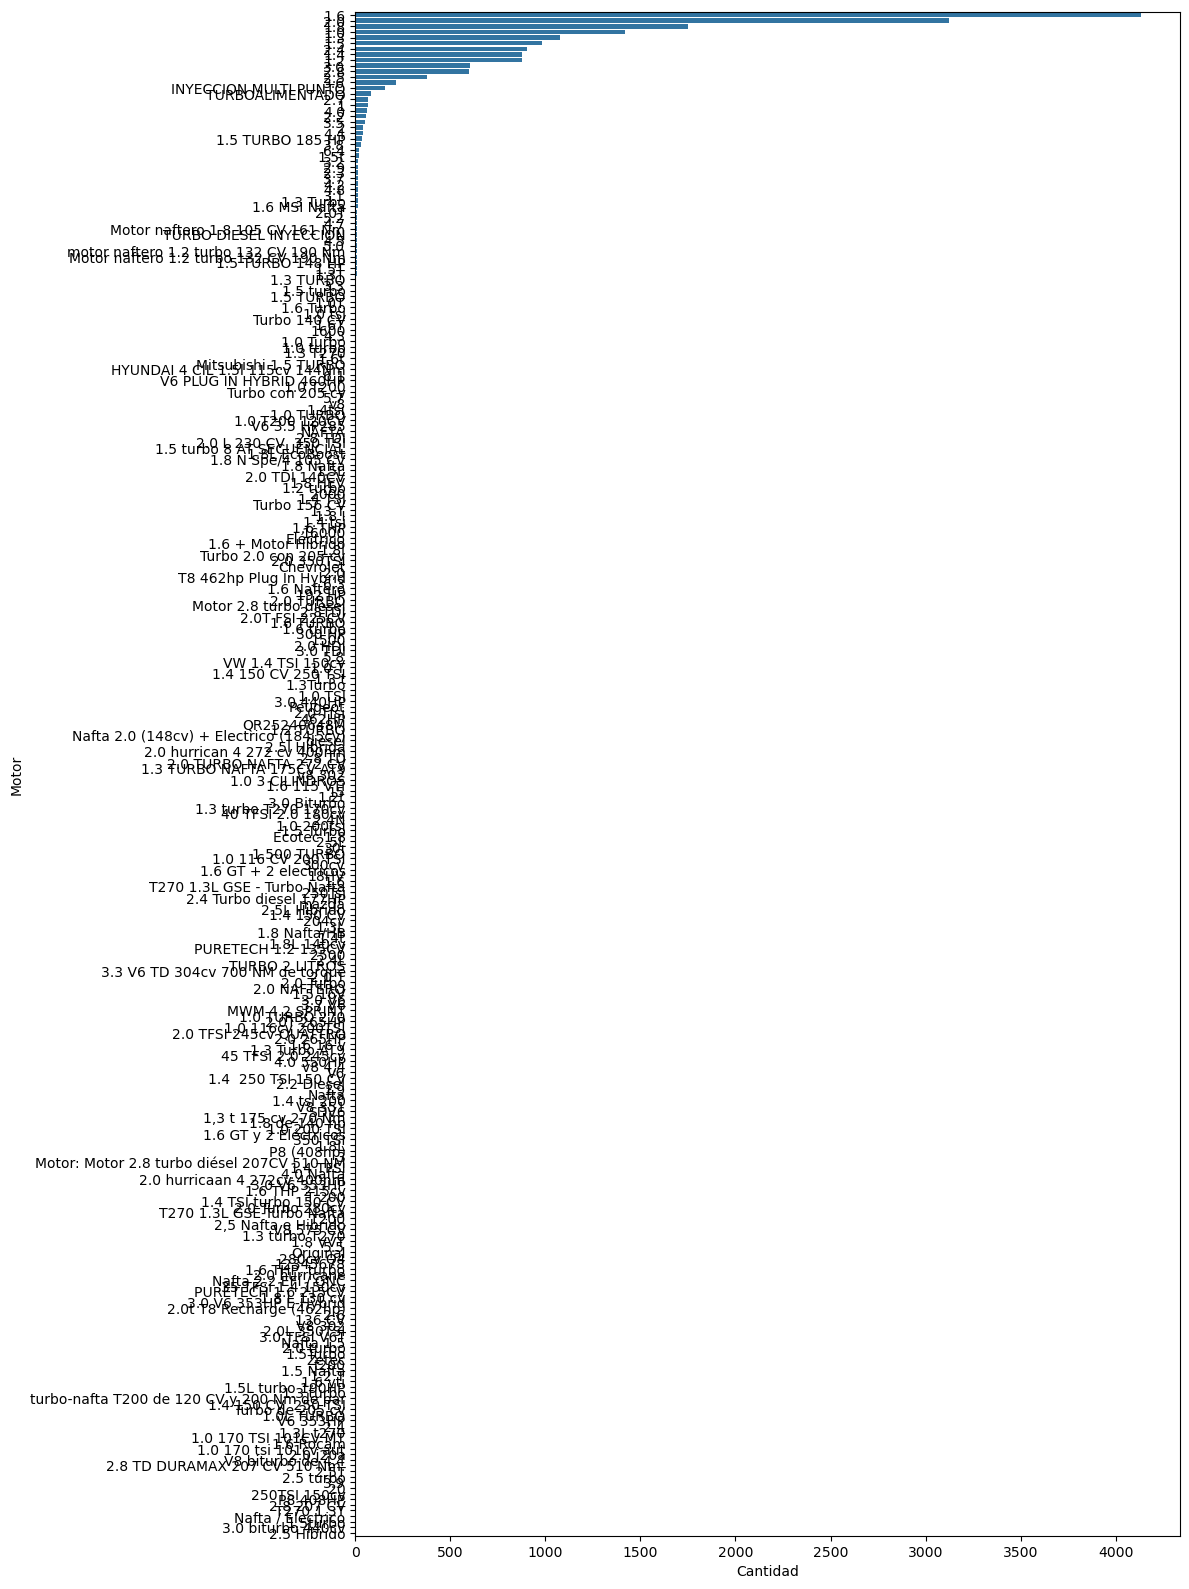

In [30]:
plt.figure(figsize=(12, 16))
sns.countplot(data=raw_dataset, y='Motor', order=raw_dataset['Motor'].value_counts().index)
plt.xlabel('Cantidad')
plt.ylabel('Motor')
plt.tight_layout()
plt.show()

In [31]:
import re

def extraer_litros(motor_str):
    if pd.isna(motor_str):
        return np.nan
    match = re.search(r'(\d+[.,]?\d*)', motor_str)
    if match:
        valor = float(match.group(1).replace(',', '.'))
        if 0 < valor < 7:
            return valor
    return np.nan

raw_dataset['LitrosMotor'] = raw_dataset['Motor'].apply(extraer_litros)

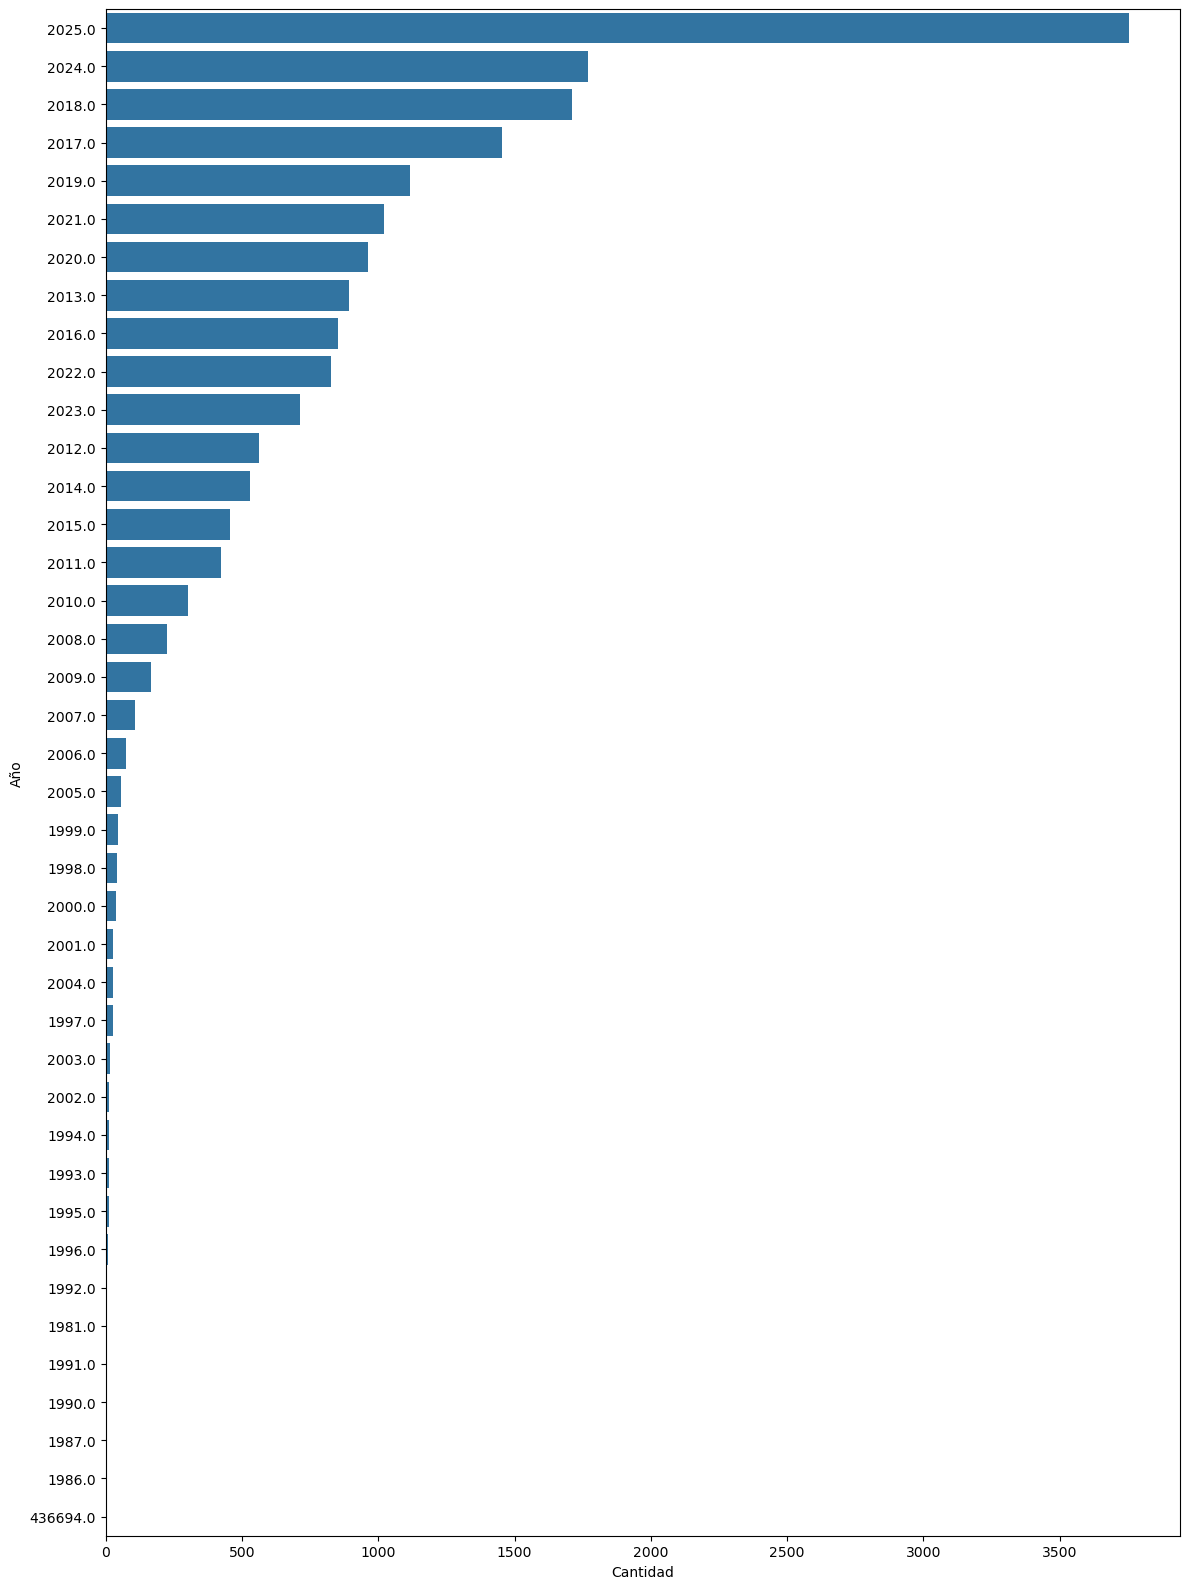

In [32]:
plt.figure(figsize=(12, 16))
sns.countplot(data=raw_dataset, y='Año', order=raw_dataset['Año'].value_counts().index)
plt.xlabel('Cantidad')
plt.ylabel('Año')
plt.tight_layout()
plt.show()

In [33]:
print(np.sort(raw_dataset['Año'].unique()))

[1981 1986 1987 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 436694]


In [34]:
# ver la fila que tiene el menor número en la columna 'Año'

print(raw_dataset.loc[raw_dataset['Año'].idxmin()])

h                               1852
Marca                           Ford
Modelo                        Bronco
Año                           1981.0
Versión                           V8
                               ...  
Transmisión_Semiautomática         0
Vendedor_concesionaria             1
Vendedor_particular                0
Vendedor_tienda                    0
LitrosMotor                      NaN
Name: 1852, Length: 233, dtype: object


<Axes: xlabel='Precio', ylabel='Kilómetros'>

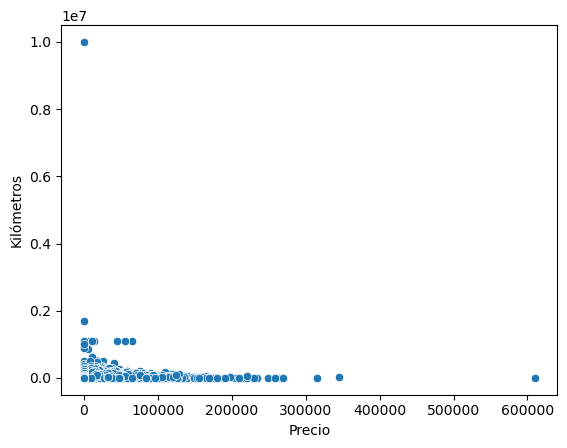

In [35]:
sns.scatterplot(x=raw_dataset['Precio'], y=raw_dataset['Kilómetros'])

In [36]:
raw_dataset.describe()

h            Año       Puertas  Con cámara de retroceso  \
count  18254.000000   18254.000000  18254.000000             18254.000000   
mean    9126.500000    2042.796209      4.965377                 0.770756   
std     5269.620242    3217.260996      0.221819                 0.281185   
min        0.000000    1981.000000      2.000000                -1.000000   
25%     4563.250000    2016.000000      5.000000                 0.727273   
50%     9126.500000    2019.000000      5.000000                 0.855305   
75%    13689.750000    2024.000000      5.000000                 0.988095   
max    18253.000000  436694.000000      7.000000                 1.000000   

         Kilómetros         Precio  Caracteres_descripcion        Blanco  \
count  1.825400e+04   18254.000000            18254.000000  18254.000000   
mean   7.538505e+04   12767.825400              470.958530      0.264271   
std    1.061987e+05   24064.530259              560.358252      0.440956   
min    0.000000e+00       0.089981                2.000000      0.000000   
25%    5.000000e+02      18.308185              100.000000      0.000000   
50%    6.800000e+04      29.281664              295.000000      0.000000   
75%    1.160000e+05   19000.000000              648.000000      1.000000   
max    9.999999e+06  610000.000000            16241.000000      1.000000   

              Negro          Gris         Plata         Acero          Azul  \
count  18254.000000  18254.000000  18254.000000  18254.000000  18254.000000   
mean       0.155089      0.302454      0.000877      0.000329      0.061411   
std        0.362000      0.459333      0.029594      0.018127      0.240090   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      1.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

               Gray          Rojo       Granito         Beige         Verde  \
count  18254.000000  18254.000000  18254.000000  18254.000000  18254.000000   
mean       0.021365      0.061247      0.000219      0.006848      0.007560   
std        0.144602      0.239789      0.014802      0.082470      0.086621   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             Marrón      Amarillo       Violeta       Naranja        Dorado  \
count  18254.000000  18254.000000  18254.000000  18254.000000  18254.000000   
mean       0.014079      0.001424      0.001917      0.004054      0.010409   
std        0.117820      0.037715      0.043747      0.063543      0.101493   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Grafito         White         Cobre         Black          Rosa  \
count  18254.000000  18254.000000  18254.000000  18254.000000  18254.000000   
mean       0.000110      0.000110      0.000055      0.000164      0.000438   
std        0.010467      0.010467      0.007402      0.012819      0.020931   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.00

In [37]:
# raw_dataset['Título'].unique()
for titulo in raw_dataset['Título'].unique():
    print(titulo)


Ford Ecosport 1.5 Freestyle 123cv 4x2
Tiguan Life 350 Tsi 4m  Ar
Volkswagen Tiguan Allspace 1.4 Tsi Trendline 150cv Dsg
Ford Ecosport 1.5 Titanium 123Cv 4X2
Jeep Compass 2.4 Sport At
Baic X55 Ii
Jeep Compass 2.4 Limited At
Kia Sorento 2.4 Ex 4x4 6at
Hyundai Tucson 2.0 Style 2Wd At
Porsche Cayenne 3.6 V6
Jeep Renegade 1.8 Sport
Peugeot 2008 1.0T Active
Fiat Pulse 1.3 Gse Drive Cvt
Chevrolet Tracker 1.8 Ltz Fwd Mt 140cv
Chevrolet Tracker 1.2 AT
Chevrolet Tracker 1.2 Turbo Ltz At
Ford Ecosport 1.5 Se 123cv 4x2 Manual
Citroën C4 Cactus 1.2 Puretech 110 At6 S&s Shine
Jeep Wrangler 3.6 Rubicon 284hp Atx
Ford Ecosport 1.5 Se 123cv 4x2 Automática
BMW X1 2.0 Sdrive 20i Sportline 192cv
Ford Ecosport 1.6 Se 110cv 4x2
Peugeot 3008 2.0 Gt-line Hdi Tiptronic
Audi Q5 2.0 I 170cv Stronic Quattro
Volkswagen Taos 1.4 250 Tsi Comfortline
Honda CR-V e:HEV Advance Hybrid
Citroën C4 Cactus 1.6 Vti 115 At6 Shine
Chevrolet Tracker 1.2 Turbo At
Nissan Kicks 1.6 Sense
Nissan Kicks 1.6 Advance Cvt Plus
Audi Q3 1

In [38]:
raw_dataset['Título'].describe()

count                              18254
unique                              2220
top       Nissan Kicks 1.6 Exclusive Cvt
freq                                 320
Name: Título, dtype: object

In [39]:
raw_dataset['Versión'].unique()

array(['1.5 Freestyle 123cv 4x2', 'LIFE 350 TSI 4M',
       '1.4 Tsi Trendline 150cv Dsg', ...,
       '2.0 GLC300 4MATIC COUPE AMG-LINE', '1.8 Awd Ltz At',
       'Trendline 200 Tsi Automatica 2025'], shape=(2072,), dtype=object)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

raw_dataset['Título'] = raw_dataset['Título'].fillna('')
vectorizer = TfidfVectorizer(lowercase=True)
X_tfidf = vectorizer.fit_transform(raw_dataset['Título'])
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
raw_dataset_with_tfidf = pd.concat([raw_dataset.reset_index(drop=True), tfidf_df], axis=1)

In [41]:
raw_dataset_with_tfidf.describe()

h            Año       Puertas  Con cámara de retroceso  \
count  18254.000000   18254.000000  18254.000000             18254.000000   
mean    9126.500000    2042.796209      4.965377                 0.770756   
std     5269.620242    3217.260996      0.221819                 0.281185   
min        0.000000    1981.000000      2.000000                -1.000000   
25%     4563.250000    2016.000000      5.000000                 0.727273   
50%     9126.500000    2019.000000      5.000000                 0.855305   
75%    13689.750000    2024.000000      5.000000                 0.988095   
max    18253.000000  436694.000000      7.000000                 1.000000   

         Kilómetros         Precio  Caracteres_descripcion        Blanco  \
count  1.825400e+04   18254.000000            18254.000000  18254.000000   
mean   7.538505e+04   12767.825400              470.958530      0.264271   
std    1.061987e+05   24064.530259              560.358252      0.440956   
min    0.000000e+00       0.089981                2.000000      0.000000   
25%    5.000000e+02      18.308185              100.000000      0.000000   
50%    6.800000e+04      29.281664              295.000000      0.000000   
75%    1.160000e+05   19000.000000              648.000000      1.000000   
max    9.999999e+06  610000.000000            16241.000000      1.000000   

              Negro          Gris         Plata         Acero          Azul  \
count  18254.000000  18254.000000  18254.000000  18254.000000  18254.000000   
mean       0.155089      0.302454      0.000877      0.000329      0.061411   
std        0.362000      0.459333      0.029594      0.018127      0.240090   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      1.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

               Gray          Rojo       Granito         Beige         Verde  \
count  18254.000000  18254.000000  18254.000000  18254.000000  18254.000000   
mean       0.021365      0.061247      0.000219      0.006848      0.007560   
std        0.144602      0.239789      0.014802      0.082470      0.086621   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             Marrón      Amarillo       Violeta       Naranja        Dorado  \
count  18254.000000  18254.000000  18254.000000  18254.000000  18254.000000   
mean       0.014079      0.001424      0.001917      0.004054      0.010409   
std        0.117820      0.037715      0.043747      0.063543      0.101493   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Grafito         White         Cobre         Black          Rosa  \
count  18254.000000  18254.000000  18254.000000  18254.000000  18254.000000   
mean       0.000110      0.000110      0.000055      0.000164      0.000438   
std        0.010467      0.010467      0.007402      0.012819      0.020931   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.00

In [42]:
raw_dataset['Versión'] = raw_dataset['Versión'].fillna('')
vectorizer = TfidfVectorizer(lowercase=True)
X_tfidf = vectorizer.fit_transform(raw_dataset['Versión'])
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
raw_dataset_with_tfidf = pd.concat([raw_dataset_with_tfidf.reset_index(drop=True), tfidf_df], axis=1)

In [43]:
raw_dataset_with_tfidf.describe()

h            Año       Puertas  Con cámara de retroceso  \
count  18254.000000   18254.000000  18254.000000             18254.000000   
mean    9126.500000    2042.796209      4.965377                 0.770756   
std     5269.620242    3217.260996      0.221819                 0.281185   
min        0.000000    1981.000000      2.000000                -1.000000   
25%     4563.250000    2016.000000      5.000000                 0.727273   
50%     9126.500000    2019.000000      5.000000                 0.855305   
75%    13689.750000    2024.000000      5.000000                 0.988095   
max    18253.000000  436694.000000      7.000000                 1.000000   

         Kilómetros         Precio  Caracteres_descripcion        Blanco  \
count  1.825400e+04   18254.000000            18254.000000  18254.000000   
mean   7.538505e+04   12767.825400              470.958530      0.264271   
std    1.061987e+05   24064.530259              560.358252      0.440956   
min    0.000000e+00       0.089981                2.000000      0.000000   
25%    5.000000e+02      18.308185              100.000000      0.000000   
50%    6.800000e+04      29.281664              295.000000      0.000000   
75%    1.160000e+05   19000.000000              648.000000      1.000000   
max    9.999999e+06  610000.000000            16241.000000      1.000000   

              Negro          Gris         Plata         Acero          Azul  \
count  18254.000000  18254.000000  18254.000000  18254.000000  18254.000000   
mean       0.155089      0.302454      0.000877      0.000329      0.061411   
std        0.362000      0.459333      0.029594      0.018127      0.240090   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      1.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

               Gray          Rojo       Granito         Beige         Verde  \
count  18254.000000  18254.000000  18254.000000  18254.000000  18254.000000   
mean       0.021365      0.061247      0.000219      0.006848      0.007560   
std        0.144602      0.239789      0.014802      0.082470      0.086621   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             Marrón      Amarillo       Violeta       Naranja        Dorado  \
count  18254.000000  18254.000000  18254.000000  18254.000000  18254.000000   
mean       0.014079      0.001424      0.001917      0.004054      0.010409   
std        0.117820      0.037715      0.043747      0.063543      0.101493   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Grafito         White         Cobre         Black          Rosa  \
count  18254.000000  18254.000000  18254.000000  18254.000000  18254.000000   
mean       0.000110      0.000110      0.000055      0.000164      0.000438   
std        0.010467      0.010467      0.007402      0.012819      0.020931   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.00

In [44]:
raw_dataset['Descripción'] = raw_dataset['Descripción'].fillna('')
vectorizer = TfidfVectorizer(lowercase=True, max_features=2000)
X_tfidf = vectorizer.fit_transform(raw_dataset['Descripción'])
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
raw_dataset_with_tfidf = pd.concat([raw_dataset_with_tfidf.reset_index(drop=True), tfidf_df], axis=1)

In [45]:
raw_dataset_with_tfidf.describe()

h            Año       Puertas  Con cámara de retroceso  \
count  18254.000000   18254.000000  18254.000000             18254.000000   
mean    9126.500000    2042.796209      4.965377                 0.770756   
std     5269.620242    3217.260996      0.221819                 0.281185   
min        0.000000    1981.000000      2.000000                -1.000000   
25%     4563.250000    2016.000000      5.000000                 0.727273   
50%     9126.500000    2019.000000      5.000000                 0.855305   
75%    13689.750000    2024.000000      5.000000                 0.988095   
max    18253.000000  436694.000000      7.000000                 1.000000   

         Kilómetros         Precio  Caracteres_descripcion        Blanco  \
count  1.825400e+04   18254.000000            18254.000000  18254.000000   
mean   7.538505e+04   12767.825400              470.958530      0.264271   
std    1.061987e+05   24064.530259              560.358252      0.440956   
min    0.000000e+00       0.089981                2.000000      0.000000   
25%    5.000000e+02      18.308185              100.000000      0.000000   
50%    6.800000e+04      29.281664              295.000000      0.000000   
75%    1.160000e+05   19000.000000              648.000000      1.000000   
max    9.999999e+06  610000.000000            16241.000000      1.000000   

              Negro          Gris         Plata         Acero          Azul  \
count  18254.000000  18254.000000  18254.000000  18254.000000  18254.000000   
mean       0.155089      0.302454      0.000877      0.000329      0.061411   
std        0.362000      0.459333      0.029594      0.018127      0.240090   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      1.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

               Gray          Rojo       Granito         Beige         Verde  \
count  18254.000000  18254.000000  18254.000000  18254.000000  18254.000000   
mean       0.021365      0.061247      0.000219      0.006848      0.007560   
std        0.144602      0.239789      0.014802      0.082470      0.086621   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             Marrón      Amarillo       Violeta       Naranja        Dorado  \
count  18254.000000  18254.000000  18254.000000  18254.000000  18254.000000   
mean       0.014079      0.001424      0.001917      0.004054      0.010409   
std        0.117820      0.037715      0.043747      0.063543      0.101493   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Grafito         White         Cobre         Black          Rosa  \
count  18254.000000  18254.000000  18254.000000  18254.000000  18254.000000   
mean       0.000110      0.000110      0.000055      0.000164      0.000438   
std        0.010467      0.010467      0.007402      0.012819      0.020931   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.00

In [46]:
raw_dataset_with_tfidf.drop(columns=['Título', 'Versión', 'Descripción', 'h', 'Marca', 'Modelo', 'Motor', 'Color'], inplace=True)

In [47]:
raw_dataset_with_tfidf.to_csv('data/pf_suvs_i302_1s2025_cleaned.csv', index=False)